# Part 3

Please implement the below function `min_dist`. This function should take a sparse list of 2D coordinates, and map them to a 2D tensor of a specified resolution. The values of each pixel in the tensor should correspond to the [euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance) between that pixel and the closest pixel which contains a data point.

You can use either numpy or pytorch tensor operations to implement the function. Use only tensor operations, no for-loops are necessary.

Here are the example outputs for the two test cases highlighted below:

Case 1: data at `[0.4, 0.3], [0.6, 0.7]`, resolution 20 pixels.

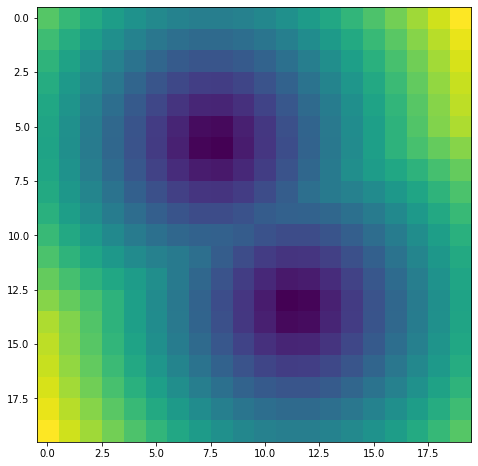


Case 2: data at `[0.4, 0.3], [0.6, 0.7], [0.3, 0.8], [0.5, 0.2]`, resolution 256 pixels.

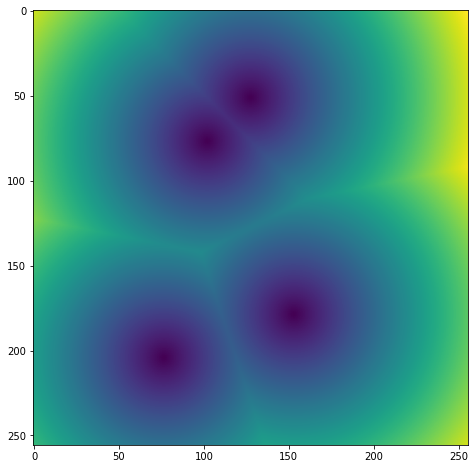


In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

(4, 2, 256, 256)
(4, 2, 256, 256)
(4, 256, 256)


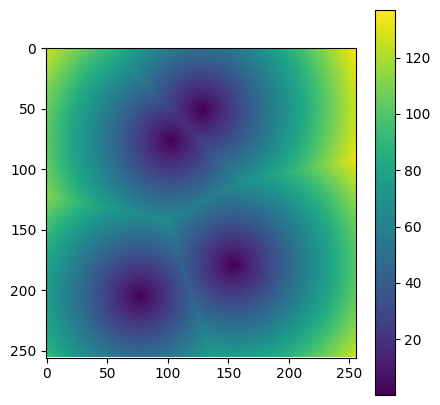

In [112]:
# points = [[0.4, 0.3], [0.6, 0.7]]
# N = 20

points = [[0.4, 0.3], [0.6, 0.7], [0.3, 0.8], [0.5, 0.2]]
N = 256

# initialize tensor shape of NxN
arr = np.ones((N, N))

# matrices of index coordinates
idx_y, idx_x = np.indices((arr.shape[0], arr.shape[1]))
idx = np.tile(np.array([idx_x, idx_y]), (len(points), 1, 1, 1))
print(idx.shape)

# scale points, reshape, & broadcast
ones_array = np.ones((2, N, N))
pts_scaled = (np.array(points) * N).reshape((len(points), 2, 1, 1))
pts_array = pts_scaled * ones_array
print(pts_array.shape)

# calculate euclidian distance
pts_euclid = np.sqrt(np.sum(np.square(idx - pts_array), axis=1))
print(pts_euclid.shape)


# min_arr = np.minimum(pts_euclid[0], pts_euclid[1])
min_arr = np.minimum(np.minimum(np.minimum(pts_euclid[0], pts_euclid[1]), pts_euclid[2]), pts_euclid[3])


plt.figure(figsize = (5,5))
plt.imshow(min_arr)
plt.colorbar()

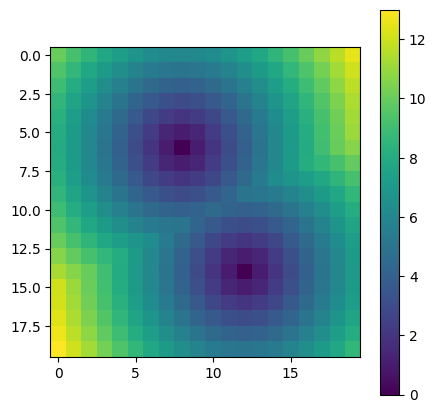

In [63]:
points = [[0.4, 0.3], [0.6, 0.7]]
N = 20

arr = np.ones((N, N))

indices = np.indices((arr.shape[0], arr.shape[1]))
idx_y,idx_x = indices

ones_array = np.ones((2, N, N))
pt1, pt2 = np.array(points) * N
pt1_array = ones_array * pt1.reshape((2,1,1))
pt2_array = ones_array * pt2.reshape((2,1,1))

pt1_euclid = np.sqrt(np.sum(np.square(np.array([idx_x,idx_y]) - pt1_array), axis=0))
pt2_euclid = np.sqrt(np.sum(np.square(np.array([idx_x,idx_y]) - pt2_array), axis=0))

min_arr = np.minimum(pt1_euclid, pt2_euclid)

plt.figure(figsize = (5,5))
plt.imshow(min_arr)
plt.colorbar()

In [ ]:
def min_dist(points, res):
  """Calculates a 2D tensor with the minimum distance from each pixel to data.

  Inputs:
    * points: a python list of 2D coordinates, normalized in the range [0,1]
    * res: the resolution of the output tensor.
  Returns:
    A res x res square tensor with floating point values corresponding to the
    euclidean distance to the closest point in points.
  """
  

In [ ]:
# Case 1:
distance_to_data = min_dist([[0.4, 0.3], [0.6, 0.7]], 20)
plt.figure(figsize=(8, 8))
plt.imshow(distance_to_data)

In [ ]:
# Case 2:
distance_to_data = min_dist([[0.4, 0.3], [0.6, 0.7], [0.3, 0.8], [0.5, 0.2]], 256)
plt.figure(figsize=(8, 8))
plt.imshow(distance_to_data)